# Importing Libraries

In [4]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# Data Preparation

In [5]:
data = pd.read_csv("train.csv")

In [6]:
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [7]:
data.shape

(1000, 12)

In [8]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [9]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[7.580000e+02 6.585050e+05 8.153720e+05 3.000000e+00 9.668300e+04
  3.000000e+00 9.000000e+00 1.300000e+01 1.510000e+02 9.900000e+01
  1.010000e+02 3.799910e+05]
 [3.600000e+01 6.076170e+05 8.054620e+05 7.000000e+00 1.256760e+05
  2.000000e+00 3.000000e+00 1.500000e+01 1.640000e+02 8.700000e+01
  9.300000e+01 1.958540e+05]
 [4.150000e+02 5.829500e+05 7.973420e+05 7.000000e+00 1.376600e+05
  2.000000e+00 1.000000e+01 1.400000e+01 1.890000e+02 9.600000e+01
  1.110000e+02 1.814145e+05]
 [6.690000e+02 5.969070e+05 8.950800e+05 2.000000e+00 8.842000e+04
  2.000000e+00 7.000000e+00 1.500000e+01 1.730000e+02 1.190000e+02
  7.200000e+01 4.010115e+05]
 [9.920000e+02 5.935440e+05 8.443330e+05 2.000000e+00 1.443220e+05
  3.000000e+00 6.000000e+00 1.300000e+01 1.800000e+02 5.400000e+01
  7.000000e+01 1.458805e+05]], shape=(5, 12), dtype=float32)


In [10]:
X = tensor_data[:,3:-1]

y = tensor_data[:,-1]
y = tf.expand_dims(y, axis = -1)

In [11]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [12]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)
     

In [14]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]

In [15]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [16]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]

In [17]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [18]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.9016232 , -0.09508765,  0.02304478,  1.1897233 ,  0.5942721 ,
        -0.829764  ,  0.684951  , -0.12394601],
       [ 1.4176657 ,  0.90547985, -0.6860247 , -0.92299235,  1.4812446 ,
        -0.15330735,  0.107137  , -0.5042217 ],
       [ 1.4176657 ,  1.3190556 , -0.6860247 ,  1.5418426 ,  1.0377584 ,
         1.1475708 ,  0.5404975 ,  0.35139856],
       [-1.4814454 , -0.3802492 , -0.6860247 ,  0.48548475,  1.4812446 ,
         0.3150088 ,  1.6479744 , -1.5024452 ],
       [-1.4814454 ,  1.5489656 ,  0.02304478,  0.13336545,  0.5942721 ,
         0.6792547 , -1.4818515 , -1.5975142 ]], dtype=float32)>

# Model Creation and Training

In [19]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)),
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 8)                 17        
_________________________________________________________________
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 34,322
Trainable params: 34,305
Non-trainable params: 17
_________________________________________________________________


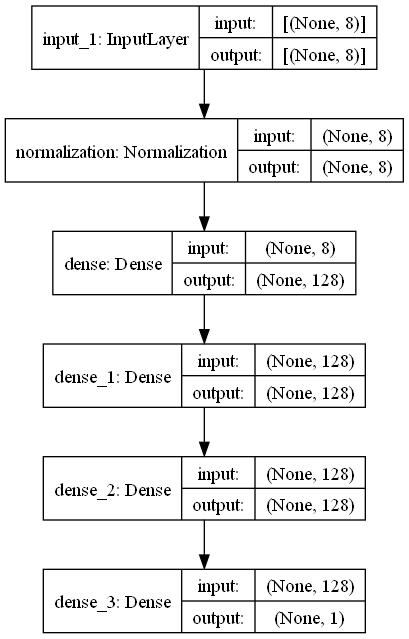

In [20]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

In [21]:
model.compile(optimizer = Adam(learning_rate = 0.1),
              loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

In [22]:
model_train = model.fit(train_dataset, validation_data=val_dataset, epochs = 100, verbose = 1)

Epoch 1/100
25/25 [==============================] - 3s 24ms/step - loss: 155161.5938 - root_mean_squared_error: 203868.1094 - val_loss: 75730.9375 - val_root_mean_squared_error: 88922.4531
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 52663.0117 - root_mean_squared_error: 64932.1562 - val_loss: 58491.0508 - val_root_mean_squared_error: 71161.5703
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 46098.3086 - root_mean_squared_error: 57685.9688 - val_loss: 44877.2617 - val_root_mean_squared_error: 55365.2617
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 43719.3398 - root_mean_squared_error: 54544.5430 - val_loss: 41756.7617 - val_root_mean_squared_error: 51838.6133
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 40732.9609 - root_mean_squared_error: 51895.0078 - val_loss: 47689.5781 - val_root_mean_squared_error: 58795.7461
Epoch 6/100
25/25 [==============================] - 0s 6ms/st

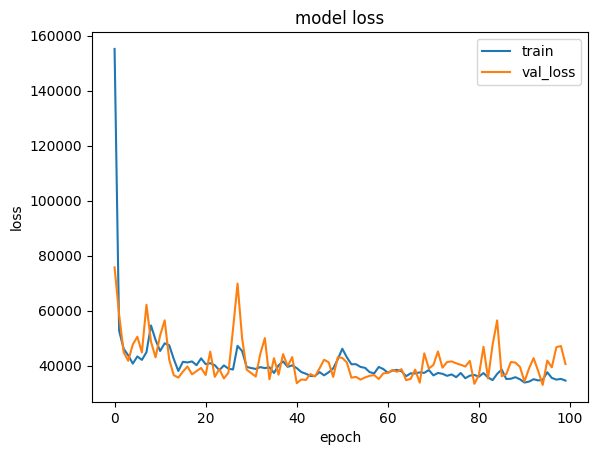

In [23]:

plt.plot(model_train.history['loss'])
plt.plot(model_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

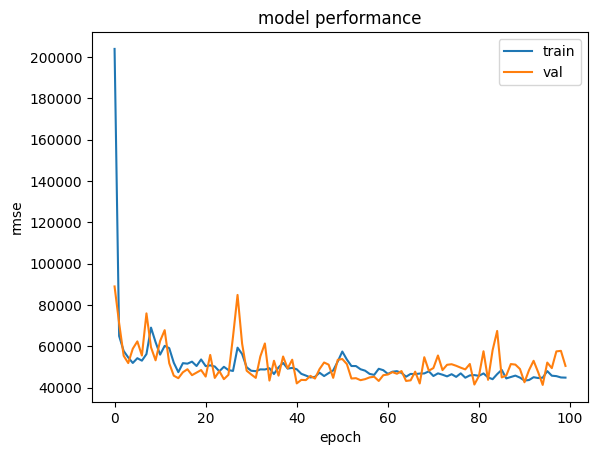

In [24]:

plt.plot(model_train.history['root_mean_squared_error'])
plt.plot(model_train.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()
     

# Evaluation and Testing

In [25]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 40438.5547 - root_mean_squared_error: 50047.8125


[40438.5546875, 50047.8125]

In [26]:
y_true = list(y_test[:,0].numpy())

In [27]:
y_pred = list(model.predict(X_test)[:,0])

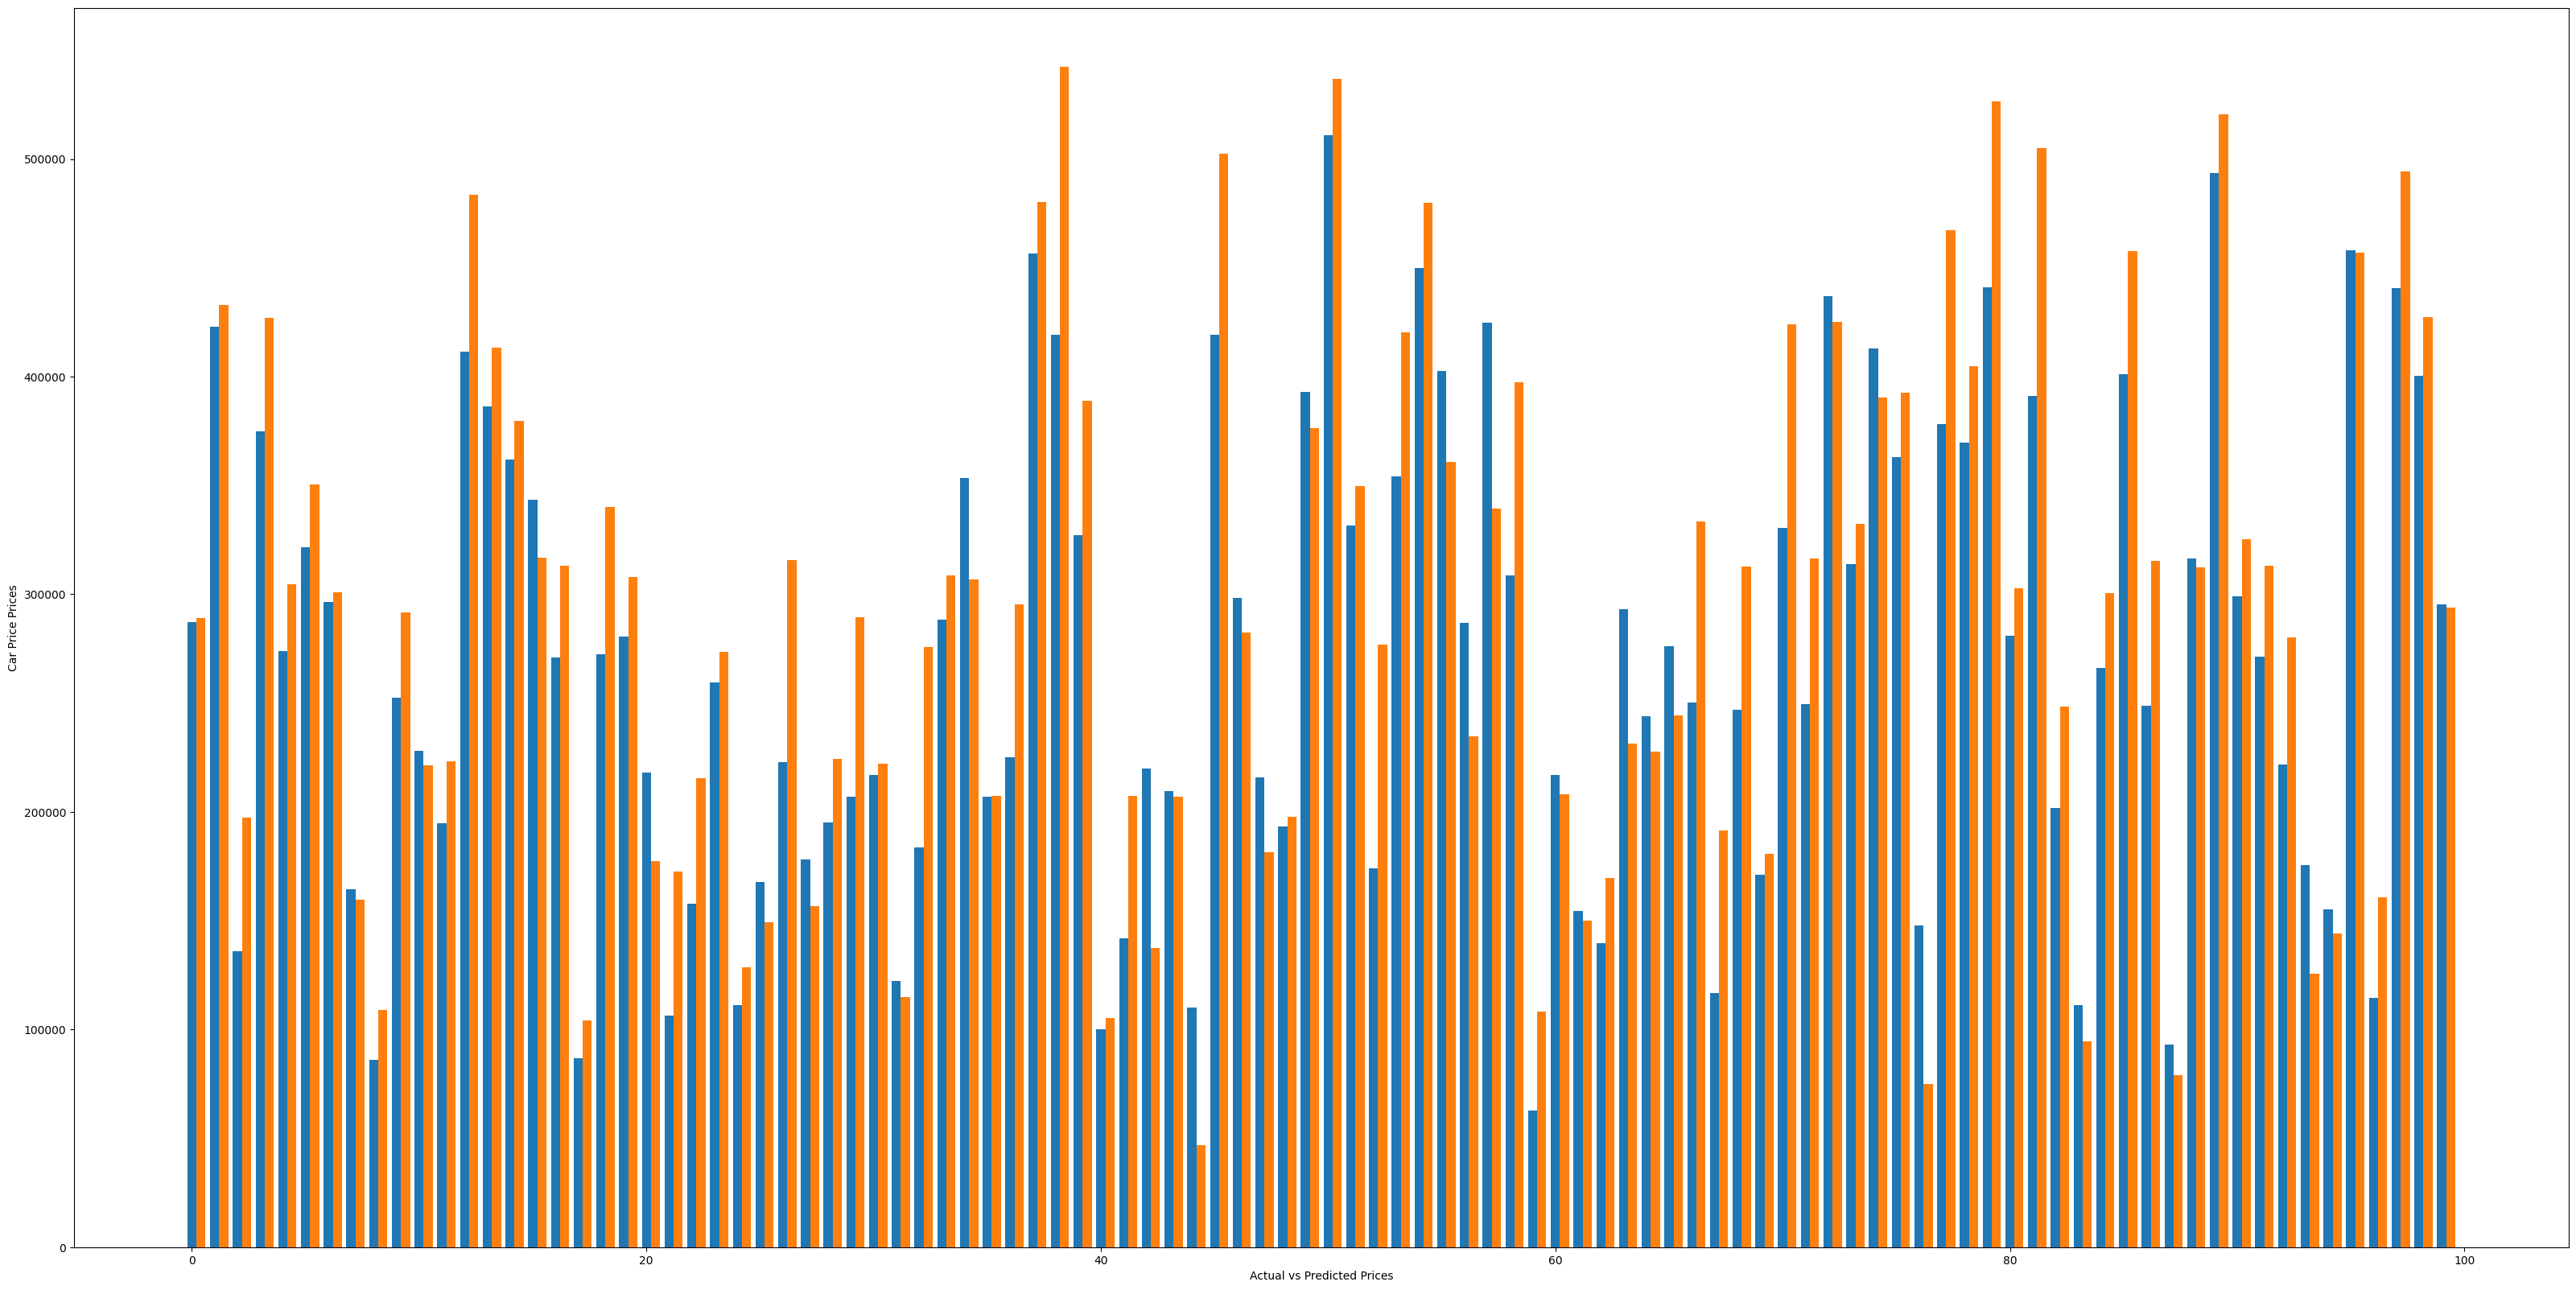

In [31]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.4

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()